In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Mobile%20Price%20Classification/train.csv")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [39]:
pd.DataFrame((data.isnull().sum()/data.shape[0])*100)

,0
battery_power,0.0
blue,0.0
clock_speed,0.0
dual_sim,0.0
fc,0.0
four_g,0.0
int_memory,0.0
m_dep,0.0
mobile_wt,0.0
n_cores,0.0


In [40]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [41]:
data.skew()

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

In [42]:
for i in data.columns:
    print(f'Unique Values of {i.title()}: {data[i].unique()}')

Unique Values of Battery_Power: [ 842 1021  563 ... 1139 1467  858]
Unique Values of Blue: [0 1]
Unique Values of Clock_Speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique Values of Dual_Sim: [0 1]
Unique Values of Fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique Values of Four_G: [0 1]
Unique Values of Int_Memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique Values of M_Dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique Values of Mobile_Wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 13

In [43]:
Categorical_var=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
Numeric_var=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

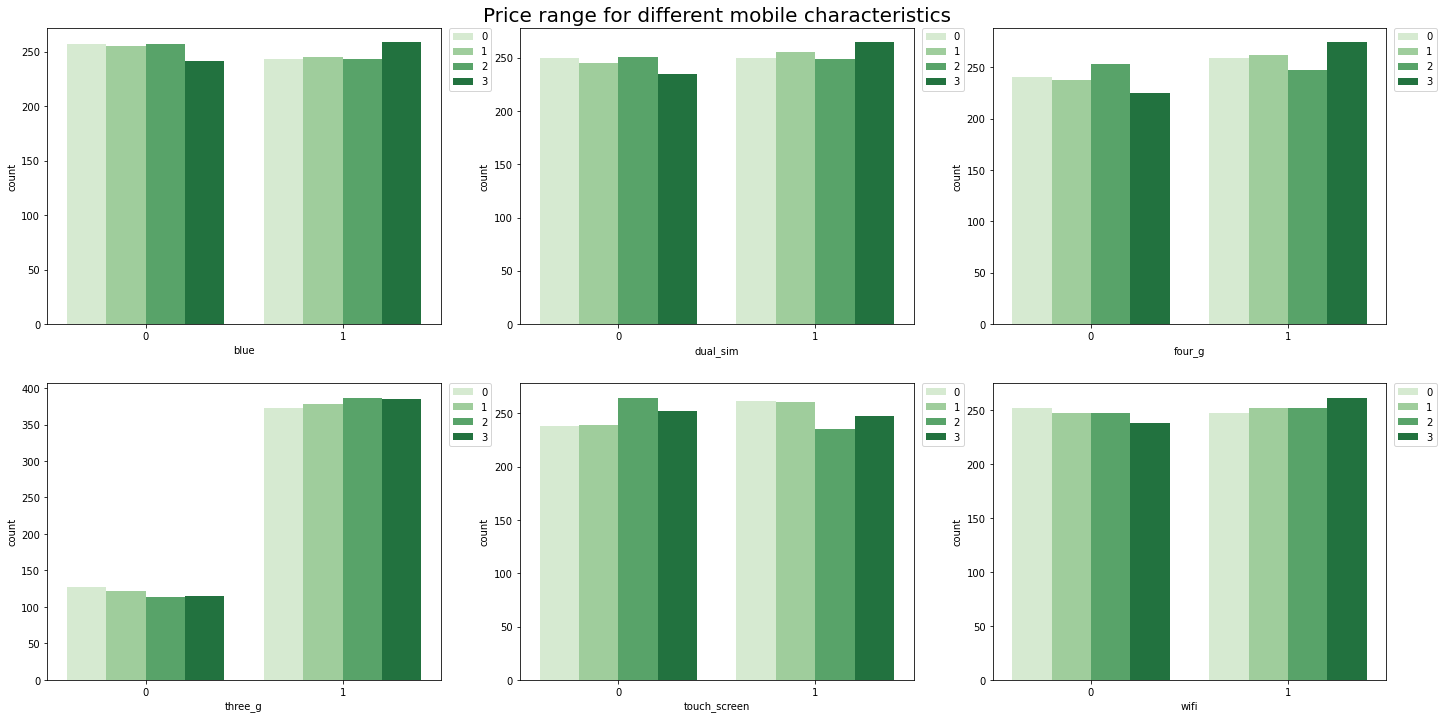

In [44]:
fig=plt.figure(figsize=(24,12))
plt.title('Price range for different mobile characteristics',fontdict={'fontsize':20})
plt.axis('off')

for i in range(len(Categorical_var)):
    fig.add_subplot(2,3,i+1)
    sns.countplot(data=data,x=Categorical_var[i], hue='price_range', palette='Greens')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='ram', ylabel='Density'>

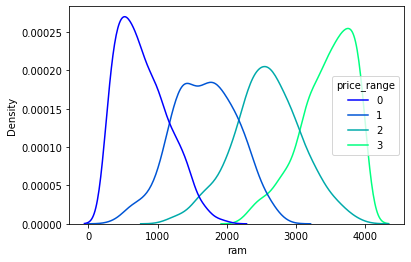

In [45]:
sns.kdeplot(data=data,x='ram', hue='price_range', palette='winter')

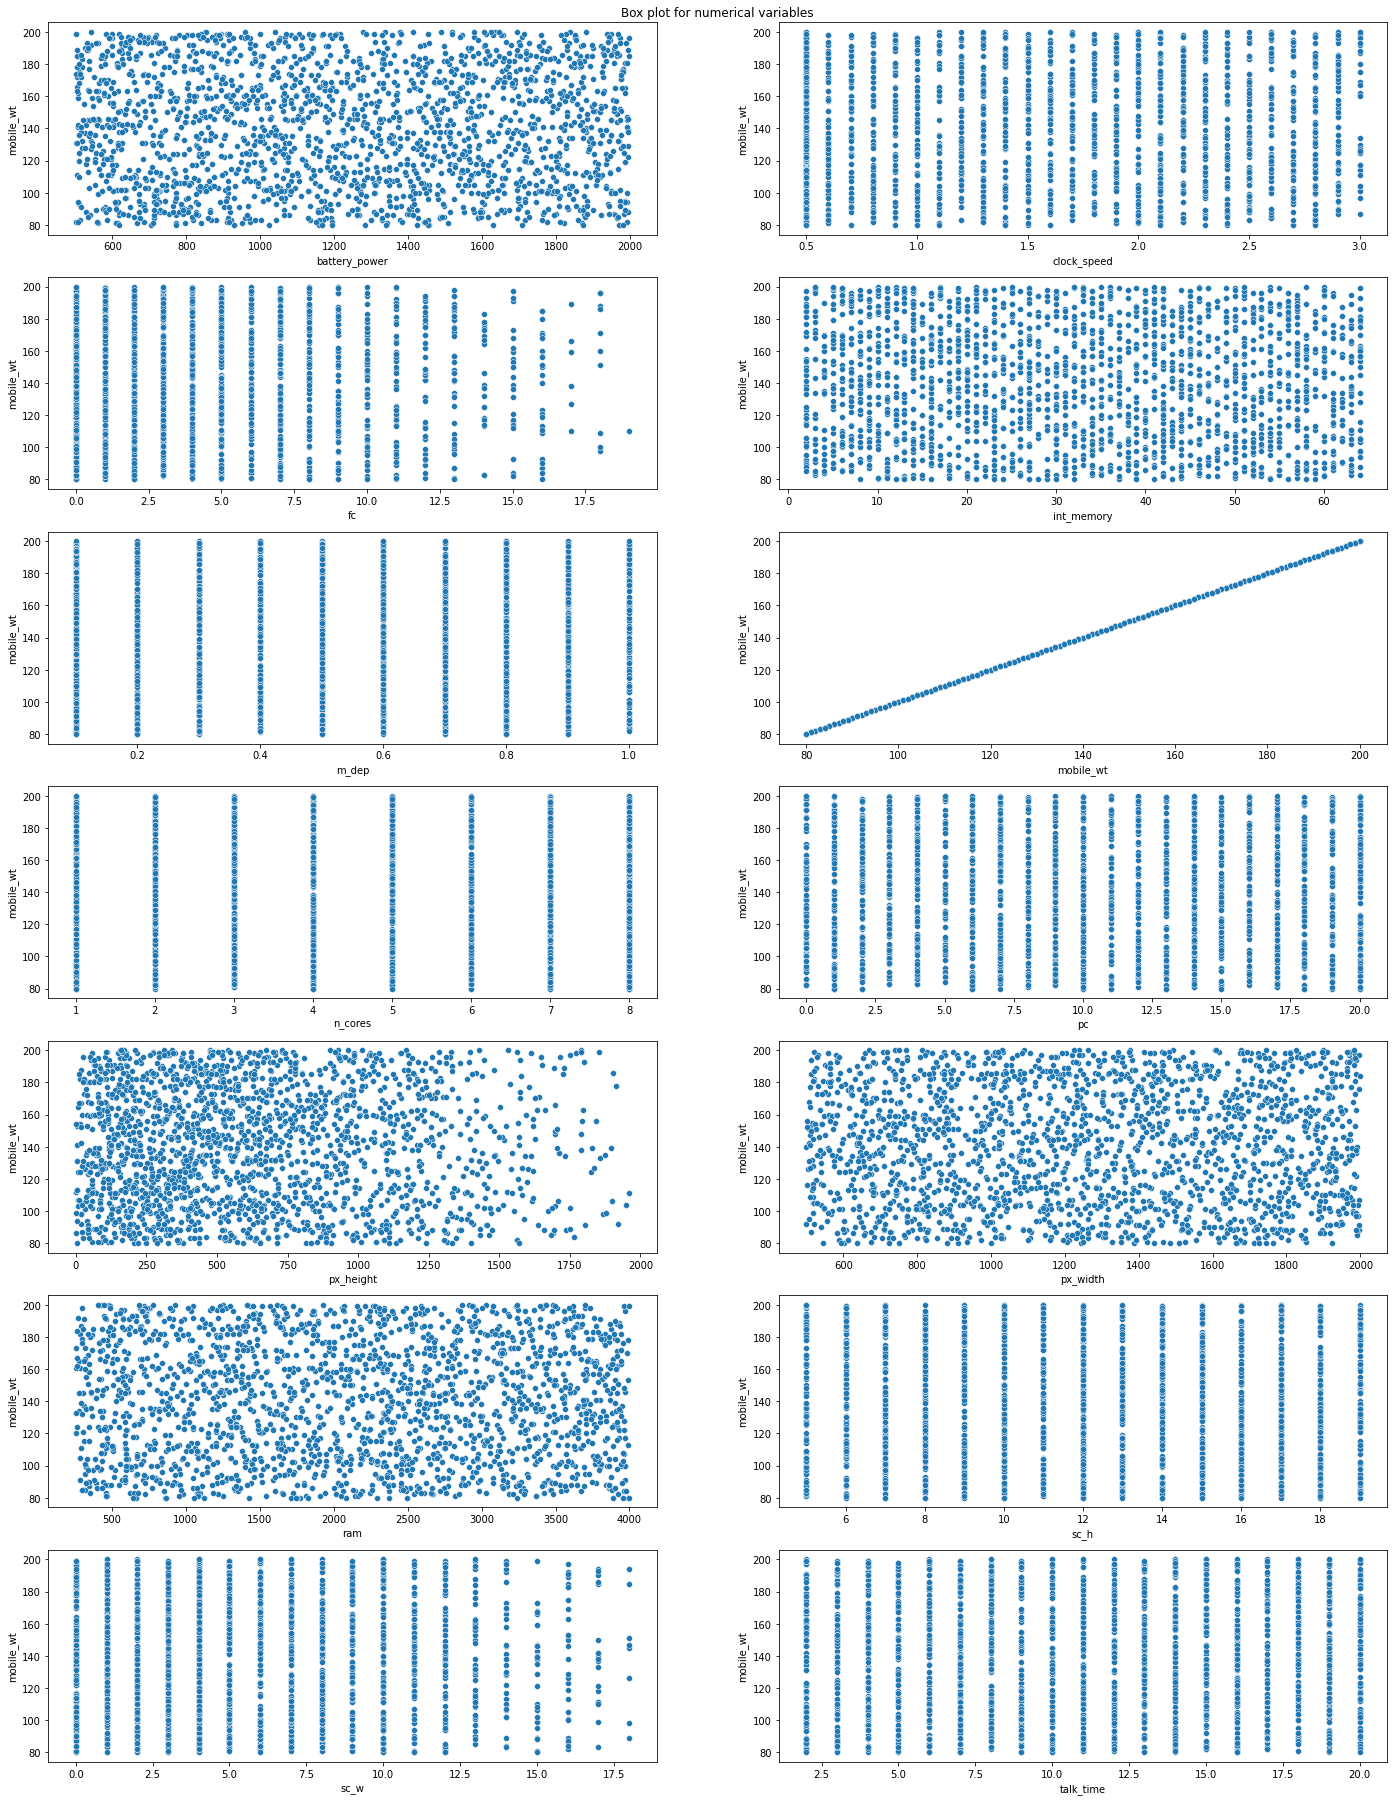

In [46]:
fig=plt.figure(figsize=(24,32))
plt.title('Box plot for numerical variables')
plt.axis('off')

for i in range(len(Numeric_var)):
    fig.add_subplot(7,2,i+1)
    sns.scatterplot(data=data,x=Numeric_var[i], y='mobile_wt')

<AxesSubplot:xlabel='price_range', ylabel='count'>

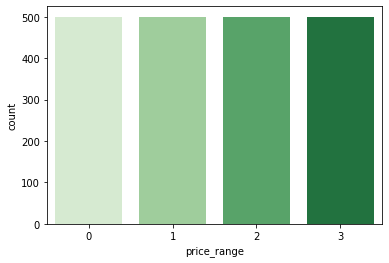

In [47]:
sns.countplot(data=data, x='price_range', palette='Greens')

In [48]:
X=data[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']].values
Y=data['price_range'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=1) 

In [50]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:,6:]= sc.fit_transform(X_train[:, 6:])
X_test[:,6:]= sc.transform(X_test[:, 6:])

In [51]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB

model_pipeline=[]
model_pipeline.append(DecisionTreeClassifier(random_state=41))
model_pipeline.append(LogisticRegression(solver='saga',random_state=42,multi_class='multinomial'))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(RandomForestClassifier(random_state=44))
model_pipeline.append(SVC(random_state=45))
model_list=['Decision Tree', 'Logistic Regression', 'K-Nearest Neighbors', 'Random_Forest_Classification', 'SVM']
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn import metrics

acc=[]
cm=[]

for classifier in model_pipeline:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc.append(round(accuracy_score(Y_test, Y_pred),2))
    cm.append(confusion_matrix(Y_test, Y_pred))

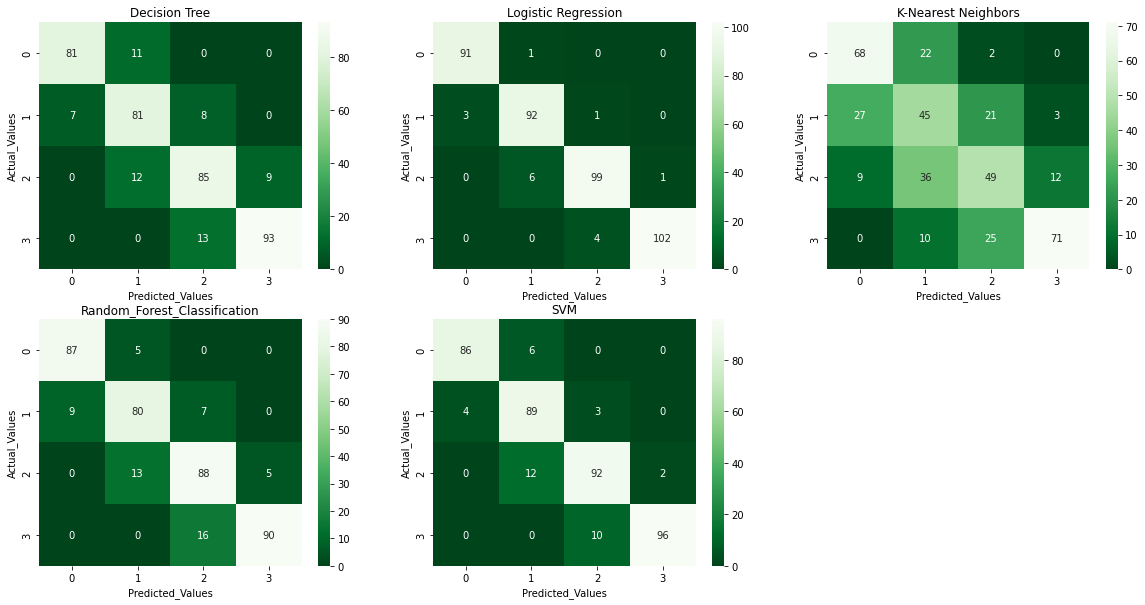

In [52]:
fig=plt.figure(figsize=(20,10))

for i in range(0,len(cm)):
    cm_con=cm[i]
    model=model_list[i]
    sub_fig_title=fig.add_subplot(2,3,i+1).set_title(model)
    plot_map=sns.heatmap(cm_con,annot=True,cmap='Greens_r',fmt='g')
    plot_map.set_xlabel('Predicted_Values')
    plot_map.set_ylabel('Actual_Values')

In [53]:
result=pd.DataFrame({'Model': model_list, 'Accuracy': acc})
result

,Model,Accuracy
0,Decision Tree,0.85
1,Logistic Regression,0.96
2,K-Nearest Neighbors,0.58
3,Random_Forest_Classification,0.86
4,SVM,0.91


In [54]:
from sklearn.model_selection import GridSearchCV
parameters = [{'solver': ['sag','saga','lbfgs', 'newton-cg', 'liblinear'],
              'penalty': ['l1', 'l2', 'elasticnet' 'none'],
                }]
grid_search = GridSearchCV(estimator = LogisticRegression(multi_class='multinomial'),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 25,
                           n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.94 %
Best Parameters: {'penalty': 'l1', 'solver': 'saga'}


In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LogisticRegression(random_state = 0, solver='saga', penalty='l1', multi_class='multinomial'), X = X_train, y = Y_train, cv = 25)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.94 %
Standard Deviation: 1.79 %


In [56]:
test=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Mobile%20Price%20Classification/test.csv')
X_import=test[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']].values

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='saga', penalty='l1', multi_class='multinomial')
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_import)

res = pd.DataFrame(Y_pred)
res.columns = ["Price_range"]
res.to_csv("prediction_results.csv", index = False)     